<a href="https://colab.research.google.com/github/samsung-ai-course/8th-9th-edition/blob/main/Chapter%203%20-%20Supervised%20Learning/Class%204%20-%20Practice%20and%20methodologies/Multi_Model_Hyperparameter_Tuning_Hotel_Reservations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Multi-Model Classification & Hyperparameter Tuning
## Hotel Reservations Cancellation Prediction

**Learning Objectives:**
1. Review and implement multiple classification algorithms
2. Compare baseline performance across different models
3. Practice systematic hyperparameter tuning with GridSearchCV
4. Learn to select the best model and metrics for the problem
5. Understand trade-offs between different algorithms

**Models to explore:** Logistic Regression, K-Nearest Neighbors, SVM, Decision Trees, Random Forest

**Dataset:** Hotel Reservations - Predict whether a booking will be canceled or not

---

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Install and import category_encoders for better categorical encoding
!pip install category_encoders
import category_encoders as ce



from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Import all the models we'll use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 📊 Part 1: Data Loading and Exploration

**Your Task:** Load the hotel reservations dataset and perform initial exploration.

**Key Questions:**
- What type of classification problem is this?
- How balanced is our dataset?
- What features might be most predictive?

In [188]:
!wget https://github.com/samsung-ai-course/8th-9th-edition/raw/refs/heads/main/Chapter%203%20-%20Supervised%20Learning/Class%204%20-%20Practice%20and%20methodologies/data/Hotel%20Reservations.csv


--2025-11-28 19:29:30--  https://github.com/samsung-ai-course/8th-9th-edition/raw/refs/heads/main/Chapter%203%20-%20Supervised%20Learning/Class%204%20-%20Practice%20and%20methodologies/data/Hotel%20Reservations.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/samsung-ai-course/8th-9th-edition/refs/heads/main/Chapter%203%20-%20Supervised%20Learning/Class%204%20-%20Practice%20and%20methodologies/data/Hotel%20Reservations.csv [following]
--2025-11-28 19:29:30--  https://raw.githubusercontent.com/samsung-ai-course/8th-9th-edition/refs/heads/main/Chapter%203%20-%20Supervised%20Learning/Class%204%20-%20Practice%20and%20methodologies/data/Hotel%20Reservations.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw

In [189]:
# TODO: Load the dataset

data = pd.read_csv("Hotel Reservations.csv")

# TODO: Display basic information
#print(f"Dataset shape: {data.shape}")
#print(f"\nFirst 5 rows:{data.head(5)}")

print("\nTarget variable distribution:")
data["booking_status"]


Target variable distribution:


,booking_status
0,Not_Canceled
1,Not_Canceled
2,Canceled
3,Canceled
4,Canceled
...,...
36270,Not_Canceled
36271,Canceled
36272,Not_Canceled
36273,Canceled


In [190]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [191]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [192]:
# TODO: Check for missing values and data types
print(f"Missing values:{data.isna().sum()}")


print(f"\nData types{data.info()}:")
# YOUR CODE HERE

Missing values:Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype 

## 🔧 Part 2: Data Preprocessing

**Your Task:** Prepare the data for machine learning.

**Remember:** Different algorithms have different requirements for data preprocessing!

In [193]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [194]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [195]:
# TODO: Identify categorical and numerical columns
categorical_cols = ['type_of_meal_plan','room_type_reserved','market_segment_type']
numerical_cols = [ 'no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights',  'required_car_parking_space','lead_time', 'arrival_year', 'arrival_month','arrival_date', 'repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Categorical columns: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
Numerical columns: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [196]:
data["booking_status"]

,booking_status
0,Not_Canceled
1,Not_Canceled
2,Canceled
3,Canceled
4,Canceled
...,...
36270,Not_Canceled
36271,Canceled
36272,Not_Canceled
36273,Canceled


In [197]:
data['booking_status']=data['booking_status'].map({'Canceled':1,'Not_Canceled':0})


In [198]:
# TODO: Prepare features and target BEFORE encoding
# Separate features and target first
X = data.drop(columns=['Booking_ID','booking_status'])# YOUR CODE HERE - drop 'Booking_ID' and 'booking_status'
y = data['booking_status']

# Encode target va

In [199]:
y

,booking_status
0,0
1,0
2,1
3,1
4,1
...,...
36270,0
36271,1
36272,0
36273,1


In [200]:
# TODO: Split data into train and test sets BEFORE encoding categorical variables
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

Training set: (27206, 17)
Test set: (9069, 17)
Train class distribution: [18347  8859]
Test class distribution: [6043 3026]


In [201]:
# TODO: Encode categorical variables using OneHotEncoder
# This creates dummy variables for each category
ohe = ce.OneHotEncoder(cols=categorical_cols)
X_train_encoded = ohe.fit_transform(X_train)
X_test_encoded =  ohe.transform(X_test)

print(f"After encoding - Training set: {X_train_encoded.shape}")
print(f"After encoding - Test set: {X_test_encoded.shape}")
print(f"New feature columns: {list(X_train_encoded.columns)}")

# TODO: Scale features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded ) # YOUR CODE HERE - fit and transform encoded training data
X_test_scaled =  scaler.fit_transform(X_test_encoded)# YOUR CODE HERE - transform encoded test data

print("\nFeatures scaled successfully!")
print(f"Scaled features mean: {X_train_scaled.mean():.6f}")
print(f"Scaled features std: {X_train_scaled.std():.6f}")

After encoding - Training set: (27206, 30)
After encoding - Test set: (9069, 30)
New feature columns: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan_1', 'type_of_meal_plan_2', 'type_of_meal_plan_3', 'type_of_meal_plan_4', 'required_car_parking_space', 'room_type_reserved_1', 'room_type_reserved_2', 'room_type_reserved_3', 'room_type_reserved_4', 'room_type_reserved_5', 'room_type_reserved_6', 'room_type_reserved_7', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type_1', 'market_segment_type_2', 'market_segment_type_3', 'market_segment_type_4', 'market_segment_type_5', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

Features scaled successfully!
Scaled features mean: -0.000000
Scaled features std: 1.000000


## 🔍 Part 3: Algorithm Review & Baseline Models

**Your Task:** Implement baseline versions of each algorithm and compare their performance.

Let's review each algorithm and understand when to use them!

### 3.1 Logistic Regression

**Key Points:**
- Linear classifier that models probability
- Fast training and prediction
- Provides probability estimates
- Works well with scaled features
- Good baseline for many problems

**When to use:** When you need interpretable linear relationships and probability estimates.

In [202]:
# TODO: Train baseline Logistic Regression
lr_baseline = LogisticRegression(random_state=42)
# YOUR CODE HERE - fit on scaled data
lr_baseline.fit(X_train_scaled, y_train)
# TODO: Make predictions and evaluate
y_pred_lr = lr_baseline.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Logistic Regression Baseline Accuracy: {accuracy_lr:.4f}")

Logistic Regression Baseline Accuracy: 0.8067


### 3.2 K-Nearest Neighbors (KNN)

**Key Points:**
- Non-parametric algorithm
- Makes predictions based on k nearest neighbors
- Sensitive to feature scaling
- Can capture non-linear relationships
- Computationally expensive for large datasets

**When to use:** When local patterns in data are important and you have sufficient computational resources.

In [203]:
# TODO: Train baseline KNN (start with k=5)
knn_baseline = KNeighborsClassifier(n_neighbors=5)
# YOUR CODE HERE - fit on scaled data
knn_baseline.fit(X_train_scaled, y_train)
# TODO: Make predictions and evaluate
y_pred_knn = knn_baseline.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test,y_pred_knn)

print(f"KNN Baseline Accuracy: {accuracy_knn:.4f}")

KNN Baseline Accuracy: 0.8508


### 3.3 Support Vector Machine (SVM)

**Key Points:**
- Finds optimal decision boundary (maximum margin)
- Works well in high-dimensional spaces
- Can use different kernels for non-linear relationships
- Sensitive to feature scaling
- Less effective on very large datasets

**When to use:** When you have medium-sized datasets and need robust performance.

In [204]:
# TODO: Train baseline SVM (use default RBF kernel)
svm_baseline = SVC(kernel= "rbf")
# YOUR CODE HERE - fit on scaled data
svm_baseline.fit(X_train_scaled, y_train)
# TODO: Make predictions and evaluate
y_pred_svm = svm_baseline.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test,y_pred_svm)

print(f"SVM Baseline Accuracy: {accuracy_svm:.4f}")

SVM Baseline Accuracy: 0.8358


### 3.4 Decision Tree

**Key Points:**
- Creates interpretable rules (if-then statements)
- Handles both numerical and categorical features naturally
- No need for feature scaling
- Prone to overfitting
- Can capture non-linear relationships

**When to use:** When interpretability is crucial and you want to understand decision rules.

In [205]:
# TODO: Train baseline Decision Tree
dt_baseline = DecisionTreeClassifier(random_state = 42)
# YOUR CODE HERE - fit on scaled data
dt_baseline.fit(X_train_scaled, y_train)
# TODO: Make predictions and evaluate
y_pred_dt = dt_baseline.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test,y_pred_dt)

print(f"Decision Tree Baseline Accuracy: {accuracy_dt:.4f}")

Decision Tree Baseline Accuracy: 0.8536


### 3.5 Random Forest

**Key Points:**
- Ensemble of decision trees
- Reduces overfitting compared to single decision tree
- Provides feature importance
- Handles mixed data types well
- Generally robust and performs well

**When to use:** When you want good performance with minimal tuning and feature importance insights.

In [206]:
# TODO: Train baseline Random Forest
rf_baseline = RandomForestClassifier(random_state = 42)
# YOUR CODE HERE - fit on original (unscaled) data
rf_baseline.fit(X_train_scaled, y_train)
# TODO: Make predictions and evaluate
y_pred_rf = rf_baseline.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test,y_pred_rf)

print(f"Random Forest Baseline Accuracy: {accuracy_rf:.4f}")


Random Forest Baseline Accuracy: 0.9024


**🎯 STOP! Time to think about evaluation metrics!**

Before we continue with hyperparameter tuning, let's consider what metric we should optimize for this specific problem.

In [207]:
data["booking_status"].value_counts()


,count
booking_status,
0,24390
1,11885


### 3.6 Baseline Comparison

**Your Task:** Compare all baseline models and analyze the results.

Baseline Model Comparison:
              Model  Accuracy
      Random Forest  0.902415
      Decision Tree  0.853567
                KNN  0.850810
                SVM  0.835814
Logistic Regression  0.806704


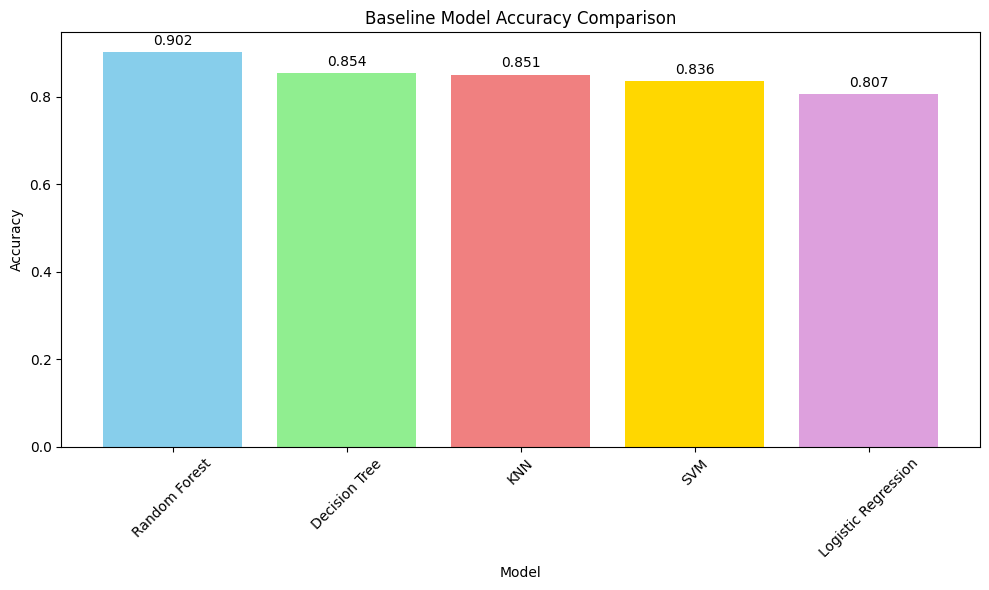

In [208]:
# TODO: Create comparison of baseline models
baseline_results = {
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_dt, accuracy_rf]
}

baseline_df = pd.DataFrame(baseline_results)
baseline_df = baseline_df.sort_values('Accuracy', ascending=False)

print("Baseline Model Comparison:")
print(baseline_df.to_string(index=False))

# TODO: Visualize the results
plt.figure(figsize=(10, 6))
bars = plt.bar(baseline_df['Model'], baseline_df['Accuracy'], color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
plt.title('Baseline Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, acc in zip(bars, baseline_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 🎯 Part 3.7: Choosing the Right Evaluation Metric

**Critical Decision Point!** Before hyperparameter tuning, we need to decide which metric to optimize.

**Your Dataset Analysis:**
Look at your class distribution above. Your dataset has approximately 33% cancellations and 67% non-cancellations. This is somewhat imbalanced but not severely so.

**Business Context Questions:**
1. **From the hotel's perspective, which is worse:**
   - Predicting a guest will show up, but they cancel (False Negative)?
   - Predicting a guest will cancel, but they show up (False Positive)? este é pior

2. **Consider the business costs:**
   - If you predict cancellation and overbooking occurs, what happens?
   - If you predict no cancellation and rooms stay empty, what's the cost?
   - Which scenario is more costly for the business? o primeiro é

**Your Task:** Based on the above considerations, choose your primary metric for hyperparameter tuning:
- **Accuracy**: Overall correctness (good for balanced problems)
- **Precision**: Of predicted cancellations, how many were actually cancelled
- **Recall**: Of actual cancellations, how many did we predict correctly
- **F1-Score**: Balance between precision and recall
- **ROC-AUC**: Overall ranking ability (good for imbalanced classes)



**Decision:** Write your chosen metric below and justify why:
```
# TODO: Fill in your choice
chosen_metric = "f1"       # Choose: 'accuracy', 'precision', 'recall', 'f1', or 'roc_auc'
justification = ""  Se achamos que é pior quando o algoritmo preve que a pessoa vai cancelar mas depois ela aparece então vamos ter de dar maior importancia a este tipo de caso . Se para isso for preciso errar algumas que assim seja.

print(f"Chosen metric for optimization: {chosen_metric}")
print(f"Justification: {justification}")
```

**Questions to consider:**
1. Which model performed best in the baseline comparison?
2. Which models might benefit most from hyperparameter tuning?
3. Are there any surprising results? Why might they have occurred?
4. Based on your chosen metric, how do the baseline results change?

## ⚙️ Part 4: Hyperparameter Tuning with GridSearchCV

**Your Task:** Use GridSearchCV to optimize each model and find the best performing algorithm.

**Learning Goals:**
- Understand which hyperparameters are most important for each algorithm
- Learn to balance search space size with computational cost
- Practice selecting appropriate evaluation metrics

### 4.1 Define Parameter Grids

**Your Task:** Define parameter grids for each algorithm.

In [209]:
# TODO: Define parameter grids for each model

# Logistic Regression parameters
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}

# KNN parameters
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights':  ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# SVM parameters
svm_param_grid = {
    'C':  [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma':  ['scale', 'auto'],
}

# Decision Tree parameters
dt_param_grid = {
    'max_depth':  [3, 5, 7, 10, None],
    'min_samples_split':  [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Random Forest parameters
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth':  [3, 5, 7, None],
    'min_samples_split':  [2, 5, 10],
}

# Print parameter grid sizes
param_grids = {
    'Logistic Regression': lr_param_grid,
    'KNN': knn_param_grid,
    'SVM': svm_param_grid,
    'Decision Tree': dt_param_grid,
    'Random Forest': rf_param_grid
}

for model_name, param_grid in param_grids.items():
    total_combinations = 1
    for values in param_grid.values():
        total_combinations *= len(values)
    print(f"{model_name}: {total_combinations} parameter combinations")

Logistic Regression: 16 parameter combinations
KNN: 20 parameter combinations
SVM: 12 parameter combinations
Decision Tree: 45 parameter combinations
Random Forest: 36 parameter combinations


### 4.2 Perform Grid Search for Each Model

**Your Task:** Run GridSearchCV for each algorithm and collect results.

**Important Note:** We'll do this step-by-step, starting with examples and then you'll complete the rest!

In [217]:
X_train_scaled[:2000,:2000]

array([[ 0.29945265,  2.20271537, -0.93285578, ..., -0.08631206,
         0.89747293, -0.78854643],
       [ 0.29945265, -0.26128999, -0.93285578, ..., -0.08631206,
        -0.24610511, -0.78854643],
       [ 0.29945265, -0.26128999,  3.68134799, ..., -0.08631206,
         0.14107041, -0.78854643],
       ...,
       [-1.6265305 , -0.26128999, -0.93285578, ...,  0.46452206,
        -0.69795234, -0.78854643],
       [ 0.29945265, -0.26128999,  1.37424611, ..., -0.08631206,
        -0.73783797, -0.78854643],
       [-1.6265305 , -0.26128999,  0.22069516, ..., -0.08631206,
        -0.81760924, -0.78854643]])

In [220]:
# TODO: Setup models and data for grid search
# Note: Some models work better with scaled data, others with original data
models = {
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), lr_param_grid, X_train_scaled),
    'KNN': (KNeighborsClassifier(), knn_param_grid, X_train_scaled),
    'SVM': (SVC(random_state=42), svm_param_grid, X_train_scaled),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), dt_param_grid, X_train_encoded),
    'Random Forest': (RandomForestClassifier(random_state=42), rf_param_grid, X_train_encoded)
}

# Store results
grid_search_results = {}

# TODO: Set your chosen metric from the previous section
scoring_metric = "f1"

print(f"Starting Grid Search for all models using '{scoring_metric}' metric...")
print("This might take a few minutes...\n")

Starting Grid Search for all models using 'f1' metric...
This might take a few minutes...



In [221]:
# EXAMPLE: Grid Search for Logistic Regression
print("🔍 EXAMPLE: Grid Search for Logistic Regression")
lr_model, lr_grid, lr_data = models['Logistic Regression']

# Create GridSearchCV object
lr_grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=lr_grid,
    cv=3,
    scoring=scoring_metric,
    n_jobs=-1,  # Use all available cores
    verbose=1   # Show progress
)

# Fit the grid search
print("Fitting Logistic Regression...")
lr_grid_search.fit(lr_data, y_train)

# Store results
grid_search_results['Logistic Regression'] = lr_grid_search
print(f"✅ Best params: {lr_grid_search.best_params_}")
print(f"✅ Best CV {scoring_metric}: {lr_grid_search.best_score_:.4f}\n")

🔍 EXAMPLE: Grid Search for Logistic Regression
Fitting Logistic Regression...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ Best params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
✅ Best CV f1: 0.6743



In [231]:
# EXAMPLE: Grid Search for KNN (another example for you)
print("🔍 EXAMPLE: Grid Search for KNN")
knn_model, knn_grid, knn_data = models['KNN']

# TODO: Create GridSearchCV object following the Logistic Regression example
knn_grid_search = GridSearchCV(
    estimator= knn_model,
    param_grid= knn_grid,
    cv=3,
    scoring=scoring_metric,
    n_jobs=-1,
    verbose=1
)

# TODO: Fit the grid search
print("Fitting KNN...")
knn_grid_search.fit(knn_data, y_train)

# Store results
grid_search_results['KNN'] = knn_grid_search
print(f"✅ Best params: {knn_grid_search.best_params_}")
print(f"✅ Best CV {scoring_metric}: {knn_grid_search.best_score_:.4f}\n")

🔍 EXAMPLE: Grid Search for KNN
Fitting KNN...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best params: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
✅ Best CV f1: 0.7827



In [232]:
# TODO: Grid Search for SVM (now it's your turn!)
print("🚀 YOUR TURN: Grid Search for SVM")
print("Follow the examples above to implement SVM grid search")

# TODO: Get the SVM model, parameters, and data
svm_model, svm_grid, svm_data = models['SVM']

# TODO: Create and fit GridSearchCV for SVM
svm_grid_search =GridSearchCV(
    estimator= svm_model,
    param_grid= svm_grid,
    cv=3,
    scoring=scoring_metric,
    n_jobs=-1,
    verbose=1
)
print("Fitting SVM...")
svm_grid_search.fit(svm_data, y_train)

# TODO: Store results and print
grid_search_results['SVM'] = svm_grid_search
print(f"✅ Best params: {svm_grid_search.best_params_}")
print(f"✅ Best CV {scoring_metric}: {svm_grid_search.best_score_:.4f}\n")

🚀 YOUR TURN: Grid Search for SVM
Follow the examples above to implement SVM grid search
Fitting SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
✅ Best CV f1: 0.7534



In [233]:
# TODO: Grid Search for Decision Tree (your implementation)
print("🚀 YOUR TURN: Grid Search for Decision Tree")

# TODO: Complete this following the pattern above
# Remember: Decision Tree uses X_train_encoded (not scaled data)
dt_model, dt_grid, dt_data = models['Decision Tree']

# TODO: Create and fit GridSearchCV for SVM
dt_grid_search =GridSearchCV(
    estimator= dt_model,
    param_grid= dt_grid,
    cv=3,
    scoring=scoring_metric,
    n_jobs=-1,
    verbose=1
)
print("Fitting DT...")
dt_grid_search.fit(dt_data, y_train)

grid_search_results['Decision Tree'] = dt_grid_search
print(f"✅ Best params: {dt_grid_search.best_params_}")
print(f"✅ Best CV {scoring_metric}: {dt_grid_search.best_score_:.4f}\n")

🚀 YOUR TURN: Grid Search for Decision Tree
Fitting DT...
Fitting 3 folds for each of 45 candidates, totalling 135 fits
✅ Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
✅ Best CV f1: 0.7994



In [234]:
# TODO: Grid Search for Random Forest (your final implementation)
print("🚀 YOUR TURN: Grid Search for Random Forest")
print("This is your last one - you've got this! 💪")

# TODO: Complete the Random Forest grid search
# Remember: Random Forest also uses X_train_encoded (not scaled data)
rf_model, rf_grid, rf_data = models['Random Forest']

rf_grid_search =GridSearchCV(
    estimator= rf_model,
    param_grid= rf_grid,
    cv=3,
    scoring=scoring_metric,
    n_jobs=-1,
    verbose=1
)
print("Fitting RF...")
rf_grid_search.fit(rf_data, y_train)


grid_search_results['Random Forest'] = rf_grid_search
print(f"✅ Best params: {rf_grid_search.best_params_}")
print(f"✅ Best CV {scoring_metric}: {rf_grid_search.best_score_:.4f}\n")

print("🎉 Grid Search completed for all models!")
print("Great job implementing all the grid searches! 🎊")

🚀 YOUR TURN: Grid Search for Random Forest
This is your last one - you've got this! 💪
Fitting RF...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ Best params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
✅ Best CV f1: 0.8301

🎉 Grid Search completed for all models!
Great job implementing all the grid searches! 🎊


## 📈 Part 5: Model Evaluation and Comparison

**Your Task:** Evaluate all optimized models on the test set and determine the best performer.

In [235]:
# TODO: Evaluate all models on test set
final_results = []

for model_name, grid_search in grid_search_results.items():
    # Get the best model
    best_model = grid_search.best_estimator_

    # Choose appropriate test data (scaled vs encoded)
    if model_name in ['Logistic Regression', 'KNN', 'SVM']:
        X_test_data = X_test_scaled
    else:
        X_test_data = X_test_encoded

    # Make predictions
    y_pred = best_model.predict(X_test_data)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    final_results.append({
        'Model': model_name,
        'Best_CV_Score': grid_search.best_score_,
        'Test_Accuracy': accuracy,
        'Test_Precision': precision,
        'Test_Recall': recall,
        'Test_F1': f1
    })

    print(f"{model_name}:")
    print(f"  Best CV Score: {grid_search.best_score_:.4f}")
    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Test F1-Score: {f1:.4f}")
    print()

# Create results DataFrame
results_df = pd.DataFrame(final_results)
results_df = results_df.round(4)
results_df = results_df.sort_values('Test_Accuracy', ascending=False)

print("\nFinal Model Comparison:")
print(results_df.to_string(index=False))

Logistic Regression:
  Best CV Score: 0.6743
  Test Accuracy: 0.8068
  Test F1-Score: 0.8020

KNN:
  Best CV Score: 0.7827
  Test Accuracy: 0.8712
  Test F1-Score: 0.8699

SVM:
  Best CV Score: 0.7534
  Test Accuracy: 0.8481
  Test F1-Score: 0.8454

Decision Tree:
  Best CV Score: 0.7994
  Test Accuracy: 0.8730
  Test F1-Score: 0.8717

Random Forest:
  Best CV Score: 0.8301
  Test Accuracy: 0.9022
  Test F1-Score: 0.9009


Final Model Comparison:
              Model  Best_CV_Score  Test_Accuracy  Test_Precision  Test_Recall  Test_F1
      Random Forest         0.8301         0.9022          0.9017       0.9022   0.9009
      Decision Tree         0.7994         0.8730          0.8716       0.8730   0.8717
                KNN         0.7827         0.8712          0.8698       0.8712   0.8699
                SVM         0.7534         0.8481          0.8459       0.8481   0.8454
Logistic Regression         0.6743         0.8068          0.8026       0.8068   0.8020


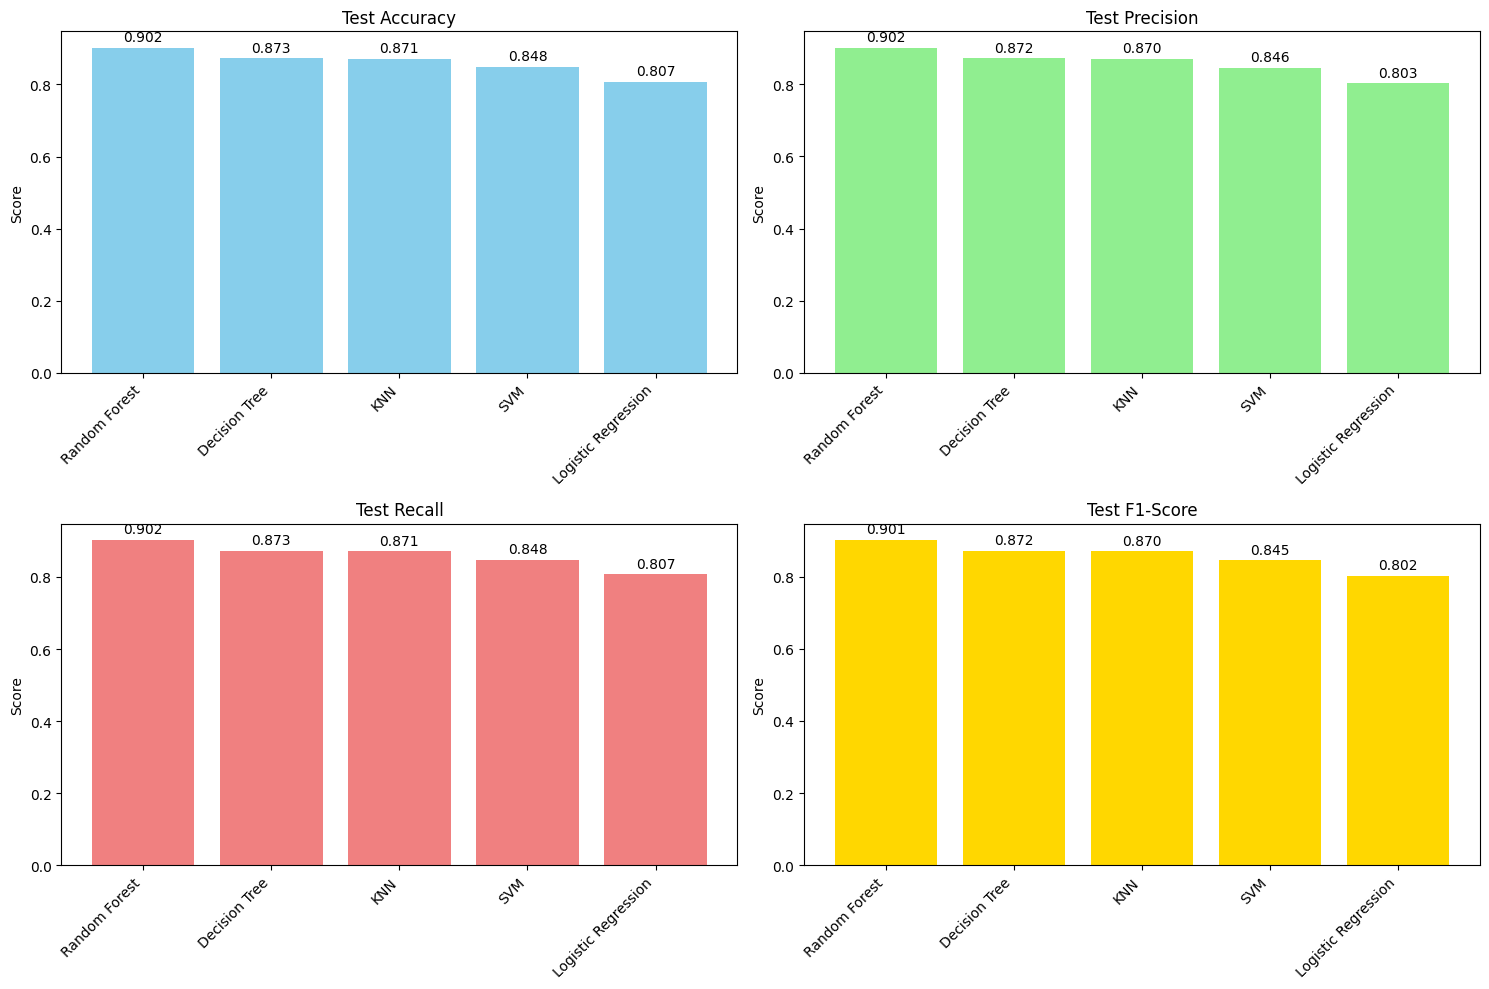

In [236]:
# TODO: Visualize the final results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1']
titles = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

for idx, (metric, title, color) in enumerate(zip(metrics, titles, colors)):
    ax = axes[idx // 2, idx % 2]

    bars = ax.bar(results_df['Model'], results_df[metric], color=color)
    ax.set_title(title)
    ax.set_ylabel('Score')
    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')

    # Add value labels
    for bar, value in zip(bars, results_df[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 🏆 Part 6: Best Model Analysis

**Your Task:** Analyze the best performing model in detail.

In [237]:
# TODO: Identify and analyze the best model
best_model_name = results_df.iloc[0]['Model']
best_grid_search = grid_search_results[best_model_name]
best_model = best_grid_search.best_estimator_

print(f"🏆 Best Model: {best_model_name}")
print(f"Best Parameters: {best_grid_search.best_params_}")
print(f"Test Accuracy: {results_df.iloc[0]['Test_Accuracy']:.4f}")
print()

# Choose appropriate test data
if best_model_name in ['Logistic Regression', 'KNN', 'SVM']:
    X_test_best = X_test_scaled
else:
    X_test_best = X_test_encoded

y_pred_best = best_model.predict(X_test_best)

# Detailed classification report
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Canceled', 'Not_Canceled']))

🏆 Best Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.9022

Detailed Classification Report:
              precision    recall  f1-score   support

    Canceled       0.91      0.95      0.93      6043
Not_Canceled       0.89      0.81      0.85      3026

    accuracy                           0.90      9069
   macro avg       0.90      0.88      0.89      9069
weighted avg       0.90      0.90      0.90      9069



<Figure size 800x600 with 0 Axes>

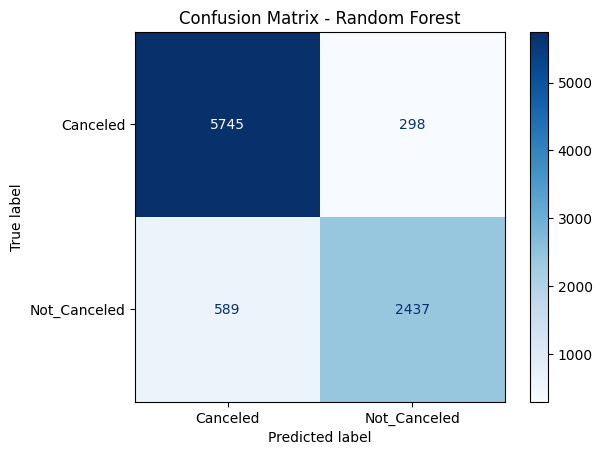

True Negatives (Correctly predicted Canceled): 5745
False Positives (Incorrectly predicted Not_Canceled): 298
False Negatives (Incorrectly predicted Canceled): 589
True Positives (Correctly predicted Not_Canceled): 2437


In [238]:
# TODO: Confusion Matrix for best model
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Canceled', 'Not_Canceled'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# Calculate additional insights
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (Correctly predicted Canceled): {tn}")
print(f"False Positives (Incorrectly predicted Not_Canceled): {fp}")
print(f"False Negatives (Incorrectly predicted Canceled): {fn}")
print(f"True Positives (Correctly predicted Not_Canceled): {tp}")

## 🔍 Part 7: Feature Importance (if applicable)

**Your Task:** Analyze feature importance for tree-based models.

Feature Importance for Random Forest:
                   feature  importance
16               lead_time    0.320390
28      avg_price_per_room    0.154378
29  no_of_special_requests    0.116699
19            arrival_date    0.083553
18           arrival_month    0.080928
3        no_of_week_nights    0.047874
2     no_of_weekend_nights    0.033170
20   market_segment_type_1    0.031210
17            arrival_year    0.026010
0             no_of_adults    0.023858


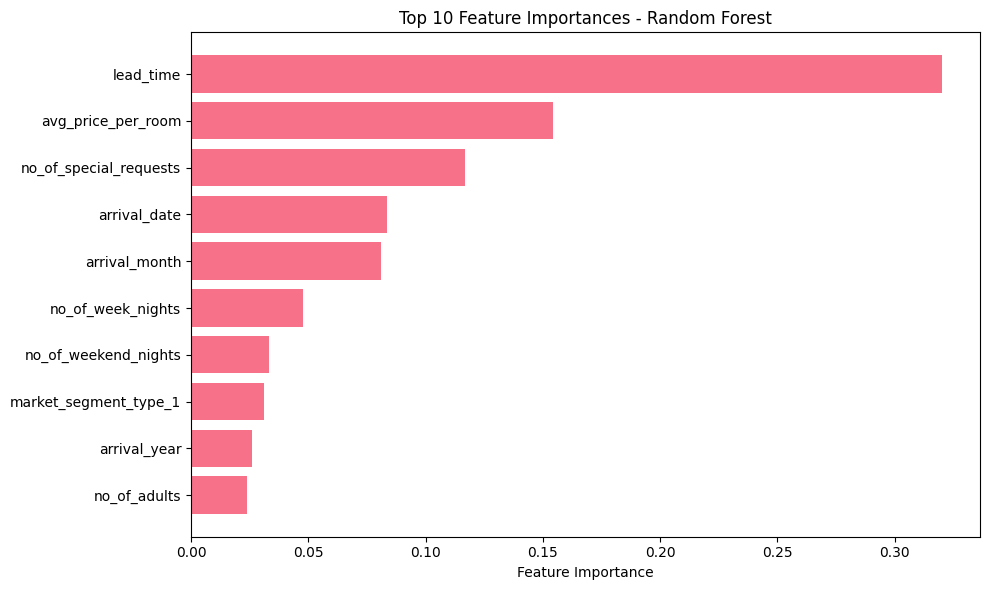

In [239]:
# TODO: Show feature importance if the best model supports it
if hasattr(best_model, 'feature_importances_'):
    # Use the encoded feature names for tree-based models
    feature_names = X_train_encoded.columns if best_model_name in ['Decision Tree', 'Random Forest'] else X.columns
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    print(f"Feature Importance for {best_model_name}:")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    top_features = feature_importance.head(10)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 10 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

elif hasattr(best_model, 'coef_'):
    # For linear models, show coefficients
    feature_names = X_train_encoded.columns if best_model_name in ['Logistic Regression'] else X.columns
    coefficients = pd.DataFrame({
        'feature': feature_names,
        'coefficient': best_model.coef_[0]
    })
    coefficients['abs_coefficient'] = np.abs(coefficients['coefficient'])
    coefficients = coefficients.sort_values('abs_coefficient', ascending=False)

    print(f"Top 10 Most Important Features by Coefficient Magnitude ({best_model_name}):")
    print(coefficients.head(10))

else:
    print(f"{best_model_name} does not provide feature importance or coefficients.")

## 📊 Part 8: Summary and Insights

**Your Task:** Summarize your findings and provide insights.

In [240]:
# TODO: Create a comprehensive summary
print("="*60)
print("MULTI-MODEL CLASSIFICATION SUMMARY")
print("="*60)

print(f"Dataset: Hotel Reservations ({X.shape[0]} samples, {X.shape[1]} features)")
print(f"Task: Binary classification (predict booking cancellation)")
print(f"Class distribution: {np.bincount(y_encoded)}")
print()

print("MODEL RANKING (by Test Accuracy):")
for idx, row in results_df.iterrows():
    print(f"{idx+1}. {row['Model']}: {row['Test_Accuracy']:.4f}")
print()

print(f"🏆 BEST MODEL: {best_model_name}")
print(f"Best Parameters: {best_grid_search.best_params_}")
print(f"Test Accuracy: {results_df.iloc[0]['Test_Accuracy']:.4f}")
print(f"Test F1-Score: {results_df.iloc[0]['Test_F1']:.4f}")
print()

# Calculate improvements
baseline_best = baseline_df.iloc[0]['Accuracy']
tuned_best = results_df.iloc[0]['Test_Accuracy']
improvement = tuned_best - baseline_best

print(f"IMPROVEMENT FROM HYPERPARAMETER TUNING:")
print(f"Best baseline accuracy: {baseline_best:.4f}")
print(f"Best tuned accuracy: {tuned_best:.4f}")
print(f"Improvement: {improvement:.4f} ({improvement/baseline_best*100:.1f}%)")

print("\n" + "="*60)

MULTI-MODEL CLASSIFICATION SUMMARY
Dataset: Hotel Reservations (36275 samples, 17 features)
Task: Binary classification (predict booking cancellation)


NameError: name 'y_encoded' is not defined

## 🤔 Reflection Questions

**Answer these questions to consolidate your learning:**

### Algorithm Comparison
1. **Which algorithm performed best and why do you think that is?**
   - Consider the nature of the data and problem
   - Think about algorithm strengths and weaknesses

2. **How did the different algorithms compare in terms of:**
   - Training time?
   - Interpretability?
   - Sensitivity to hyperparameters?

### Hyperparameter Tuning
3. **Which models benefited most from hyperparameter tuning?**
   - Compare baseline vs tuned performance
   - Which hyperparameters had the biggest impact?

4. **What trade-offs did you observe?**
   - Computational cost vs performance improvement
   - Model complexity vs interpretability

### Problem-Specific Insights
5. **What did you learn about hotel booking cancellations?**
   - Which features were most important?
   - What patterns emerged?

6. **Which evaluation metric is most important for this problem and why?**
   - Accuracy, Precision, Recall, or F1-Score?
   - Consider the business implications

### Next Steps
7. **How would you improve the model further?**
   - Feature engineering ideas?
   - Other algorithms to try?
   - Ensemble methods?

8. **How would you deploy this model in practice?**
   - What considerations are important?
   - How would you monitor performance?

**Write your answers below:**

```
Your reflection answers here...
```

## 🎉 Congratulations!

You've successfully completed a comprehensive multi-model classification project! You've learned:

✅ **Algorithm Understanding:** Key characteristics of 5 different classification algorithms  
✅ **Baseline Comparison:** How to implement and compare multiple models  
✅ **Hyperparameter Tuning:** Systematic optimization using GridSearchCV  
✅ **Model Evaluation:** Comprehensive evaluation using multiple metrics  
✅ **Result Interpretation:** Analysis of model performance and feature importance  

**Key Takeaways:**
- Different algorithms excel in different scenarios
- Hyperparameter tuning can significantly improve performance
- Model selection should consider both performance and practical constraints
- Evaluation metrics should align with business objectives

**Next Steps in Your ML Journey:**
- Learn about ensemble methods (combining multiple models)
- Explore advanced feature engineering techniques
- Study model interpretation and explainability
- Practice with different types of datasets and problems

Keep experimenting and happy learning! 🚀